In [4]:
import numpy as np 
import pandas as pd

In [19]:
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)

# replace name of column 2 with 'acidic'
df.columns = ['control', 'acidic', 'basic', 'cold', 'hot']
df2 = df.copy()
df

df = df.drop(columns=['control'])
df

,acidic,basic,cold,hot
0,141071.89210,130040.83840,107932.01640,230748.16650
1,88961.81762,61988.34321,57136.32632,169684.93170
2,91397.04200,89870.02158,253509.84680,103469.21790
3,121576.95410,215974.44950,59907.77733,55604.38588
4,79278.68864,124682.02000,127957.59640,123669.19050
5,262913.09950,251481.08470,193991.94370,99056.62358
6,71888.58326,184515.90000,69650.59020,83015.68652
7,225299.30560,107032.69220,236382.24610,98087.34512
8,139569.58320,108509.52130,106672.57710,167255.37850
9,185597.62390,294733.28490,128688.39420,170105.91800


In [ ]:
# run anova to see if there is a significant difference between the groups
import scipy.stats as stats

F, p = stats.f_oneway(df['acidic'], df['basic'], df['cold'], df['hot'])

# run tukey test to see which groups are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

melted = pd.melt(df)
posthoc = pairwise_tukeyhsd(melted['value'], melted['variable'], alpha=0.05)
print(posthoc)


0.3110146826693212 0.8172696203725878
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
acidic  basic  16127.3566 0.9488  -64407.8981 96662.6113  False
acidic   cold  -6572.5275 0.9962  -87107.7823 73962.7272  False
acidic    hot -10685.7746 0.9841  -91221.0293 69849.4802  False
 basic   cold -22699.8841 0.8722 -103235.1389 57835.3706  False
 basic    hot -26813.1312 0.8066 -107348.3859 53722.1236  False
  cold    hot   -4113.247 0.9991  -84648.5018 76422.0077  False
---------------------------------------------------------------


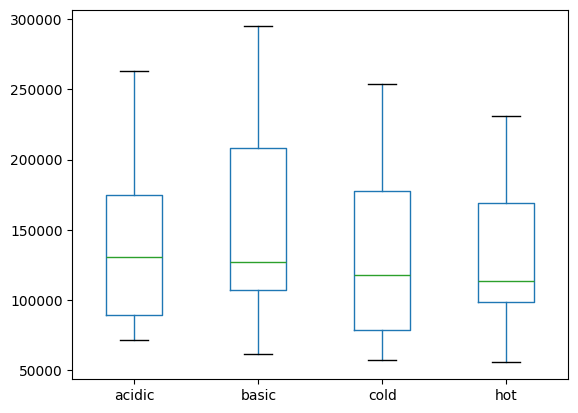

In [15]:
import matplotlib.pyplot as plt

# plot the data
df.boxplot(grid=False)
plt.show()

In [20]:
df2

,control,acidic,basic,cold,hot
0,3.719037e+06,141071.89210,130040.83840,107932.01640,230748.16650
1,5.956172e+05,88961.81762,61988.34321,57136.32632,169684.93170
2,9.369077e+05,91397.04200,89870.02158,253509.84680,103469.21790
3,6.740708e+05,121576.95410,215974.44950,59907.77733,55604.38588
4,3.937789e+06,79278.68864,124682.02000,127957.59640,123669.19050
5,6.445296e+05,262913.09950,251481.08470,193991.94370,99056.62358
6,2.003897e+06,71888.58326,184515.90000,69650.59020,83015.68652
7,2.165483e+06,225299.30560,107032.69220,236382.24610,98087.34512
8,1.588263e+06,139569.58320,108509.52130,106672.57710,167255.37850
9,1.146669e+06,185597.62390,294733.28490,128688.39420,170105.91800


In [21]:
# run anova again
F, p = stats.f_oneway(df2['control'], df2['acidic'], df2['basic'], df2['cold'], df2['hot'])
print(F, p)

# run tukey test again
melted = pd.melt(df2)
posthoc = pairwise_tukeyhsd(melted['value'], melted['variable'], alpha=0.05)
print(posthoc)


16.685311056232017 1.8707315641204535e-08
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
 acidic   basic   16127.3566   1.0  -688195.0592  720449.7724  False
 acidic    cold   -6572.5275   1.0  -710894.9433  697749.8882  False
 acidic control 1600470.7994   0.0   896148.3837 2304793.2152   True
 acidic     hot  -10685.7746   1.0  -715008.1903  693636.6412  False
  basic    cold  -22699.8841   1.0  -727022.2999  681622.5316  False
  basic control 1584343.4429   0.0   880021.0271 2288665.8586   True
  basic     hot  -26813.1312   1.0  -731135.5469  677509.2846  False
   cold control  1607043.327   0.0   902720.9112 2311365.7427   True
   cold     hot    -4113.247   1.0  -708435.6628  700209.1687  False
control     hot -1611156.574   0.0 -2315478.9898 -906834.1582   True
-------------------------------------------------------------